In [17]:
import pandas as pd

In [58]:
data =pd.read_csv("train.csv")

In [59]:
data

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB


In [61]:
df =data.dropna().reset_index(drop=True)

In [62]:
df["sentiment"].value_counts()

neutral     11117
positive     8582
negative     7781
Name: sentiment, dtype: int64

# Data Pre-processing

In [63]:
import nltk
from nltk.corpus import stopwords
stop_words =set(stopwords.words("English"))

Change to lower case

In [64]:
df["text_lc"] =df["text"].str.lower()

Remove special character

In [65]:
import re
df["text_sc"] =df["text_lc"].apply(lambda x:re.sub(r"[^A-Za-z]+" , " " ,x) )

Remove stop words

In [66]:
def remove_stopwords(input_text):
    input_tokens = input_text.split()
    filtered_input_tokens = [token for token in input_tokens if token not in stop_words]
    return filtered_input_tokens

In [67]:
df["text_rem_sw"] = df["text_sc"].apply(lambda x : remove_stopwords(x))

Combine text

In [68]:
df["final"] =df["text_rem_sw"].apply(lambda x:" ".join(x))

In [69]:
df

,textID,text,selected_text,sentiment,text_lc,text_sc,text_rem_sw,final
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,"i`d have responded, if i were going",i d have responded if i were going,"[responded, going]",responded going
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,sooo sad i will miss you here in san diego!!!,sooo sad i will miss you here in san diego,"[sooo, sad, miss, san, diego]",sooo sad miss san diego
2,088c60f138,my boss is bullying me...,bullying me,negative,my boss is bullying me...,my boss is bullying me,"[boss, bullying]",boss bullying
3,9642c003ef,what interview! leave me alone,leave me alone,negative,what interview! leave me alone,what interview leave me alone,"[interview, leave, alone]",interview leave alone
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,"sons of ****, why couldn`t they put them on t...",sons of why couldn t they put them on the rel...,"[sons, put, releases, already, bought]",sons put releases already bought
...,...,...,...,...,...,...,...,...
27475,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative,wish we could come see u on denver husband l...,wish we could come see u on denver husband lo...,"[wish, could, come, see, u, denver, husband, l...",wish could come see u denver husband lost job ...
27476,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative,i`ve wondered about rake to. the client has ...,i ve wondered about rake to the client has ma...,"[wondered, rake, client, made, clear, net, for...",wondered rake client made clear net force devs...
27477,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive,yay good for both of you. enjoy the break - y...,yay good for both of you enjoy the break you ...,"[yay, good, enjoy, break, probably, need, hect...",yay good enjoy break probably need hectic week...
27478,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive,but it was worth it ****.,but it was worth it,[worth],worth


# Data Analysis using WordCloud

In [71]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

Positive Words

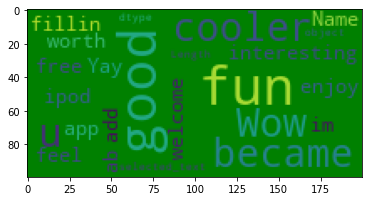

In [72]:
positive =df[df["sentiment"]=="positive"]
wc =WordCloud(background_color="green",width=200,height=100).generate(str(positive["selected_text"]))
plt.imshow(wc)

Negative Words

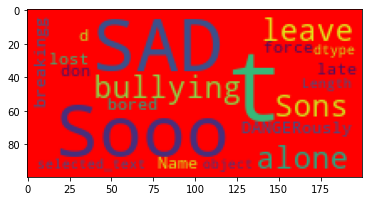

In [73]:
positive =df[df["sentiment"]=="negative"]
wc =WordCloud(background_color="red",width=200,height=100).generate(str(positive["selected_text"]))
plt.imshow(wc)

# Countvectorizer

In [74]:
from sklearn.feature_extraction.text import CountVectorizer

In [76]:
count_vect = CountVectorizer()
documents = df["selected_text"]
matrix = count_vect.fit_transform(documents)

In [77]:
matrix 

<27480x17620 sparse matrix of type '<class 'numpy.int64'>'
	with 173221 stored elements in Compressed Sparse Row format>

In [80]:
count_array = matrix.toarray()
count_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [83]:
X = pd.DataFrame(data = count_array,columns=count_vect.get_feature_names())

In [84]:
Y = df["sentiment"]

In [89]:
X.shape

(27480, 17620)

In [90]:
Y.shape

(27480,)


# Build Model

In [86]:
from sklearn.model_selection import train_test_split

In [88]:
X_train,X_valid , Y_train,Y_valid = train_test_split(X,Y,test_size=0.20)

In [91]:
X_train.shape

(21984, 17620)

In [92]:
Y_train.shape

(21984,)

In [93]:
#Classification
from sklearn.naive_bayes import MultinomialNB

In [94]:
classifier  = MultinomialNB()

In [96]:
classifier.fit(X_train,Y_train)

MultinomialNB()

In [97]:
y_train_pred = classifier.predict(X_train)

In [98]:
y_train_pred

array(['neutral', 'neutral', 'neutral', ..., 'neutral', 'neutral',
       'neutral'], dtype='<U8')

# Accuracy

In [99]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_train,y_train_pred)

0.849754366812227